In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
movies = pd.read_csv('data//archive//tmdb_5000_movies.csv')
print('movies.shape : ',movies.shape)
movies.head()

movies.shape :  (4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.loc[0,'cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [10]:
credits = pd.read_csv('data//archive//tmdb_5000_credits.csv')
print('credits.shape : ',credits.shape)
credits.head()

credits.shape :  (4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
data = pd.merge(    left=movies,
    right= credits,
    how='inner',
    left_on='id',
    right_on='movie_id')

In [16]:
data['profit'] = data['revenue'] - data['budget']

In [17]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100


In [21]:
data.shape

(4803, 25)

In [20]:
data[data.profit<0].shape

(1326, 25)

In [56]:
df = data
additional_cols = ['original_title','popularity','profit',]
avg_rating_col = 'vote_average'
no_of_votes_col = 'vote_count'
minimum_votes_quantile = 0.75

def get_weighted_average(df,avg_rating_col ,no_of_votes_col , minimum_votes_quantile , additional_cols):
    df=df.copy()
    m = df[no_of_votes_col].quantile(minimum_votes_quantile)
    c = df[avg_rating_col].mean()
    df['weighted_average'] = ((df[avg_rating_col]* df[no_of_votes_col]) + (c*m))/(df[no_of_votes_col]+m)
    out_cols = [avg_rating_col,no_of_votes_col,'weighted_average']
    
    print('c , m : ',(c,m))
    
    return df[additional_cols+out_cols]
data2 = get_weighted_average(df,avg_rating_col ,no_of_votes_col , minimum_votes_quantile , additional_cols)

c , m :  (6.092171559442011, 737.0)


In [25]:
data2

,original_title,popularity,profit,vote_average,vote_count,weighted_average
0,Avatar,150.437577,2550965087,7.2,11800,7.134875
1,Pirates of the Caribbean: At World's End,139.082615,661000000,6.9,4500,6.786315
2,Spectre,107.376788,635674609,6.3,4466,6.270561
3,The Dark Knight Rises,112.312950,834939099,7.6,9106,7.487101
4,John Carter,43.926995,24139100,6.1,2124,6.097983
...,...,...,...,...,...,...
4798,El Mariachi,14.269792,1820920,6.6,238,6.216134
4799,Newlyweds,0.642552,-9000,5.9,5,6.090877
4800,"Signed, Sealed, Delivered",1.444476,0,7.0,6,6.099503
4801,Shanghai Calling,0.857008,0,5.7,7,6.088482


In [46]:
def recommend_by(df,col,title_col,top):
    sort_ = df.sort_values(col,ascending=False)
    plt.figure(figsize=(12,6))
    axis1=sns.barplot(x=sort_[col].head(top), y=sort_[title_col].head(top), data=df,)
    #plt.xlim(4, 10)
    plt.title('Best Movies by '+col, weight='bold')
    plt.xlabel(col+ 'Score', weight='bold')
    plt.ylabel('Movie Title', weight='bold')


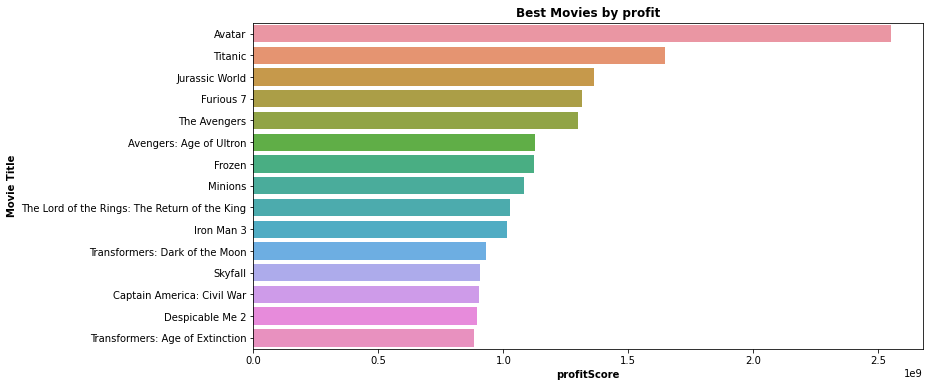

In [47]:
recommend_by(df=data2,col='profit',title_col='original_title',top=15)

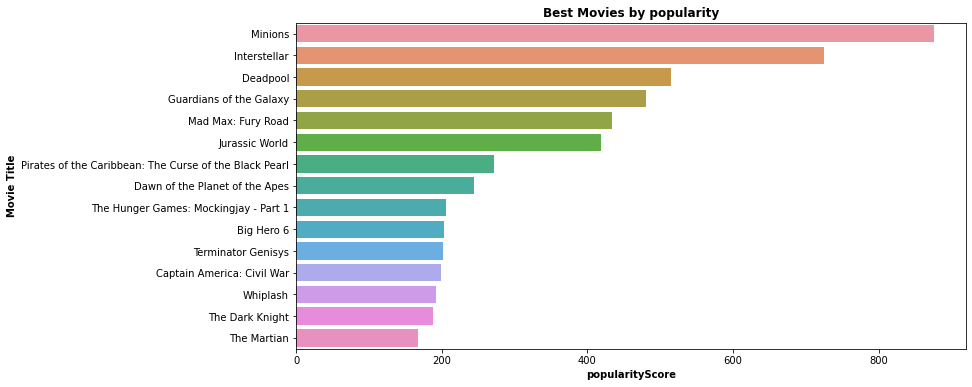

In [48]:
recommend_by(df=data2,col='popularity',title_col='original_title',top=15)

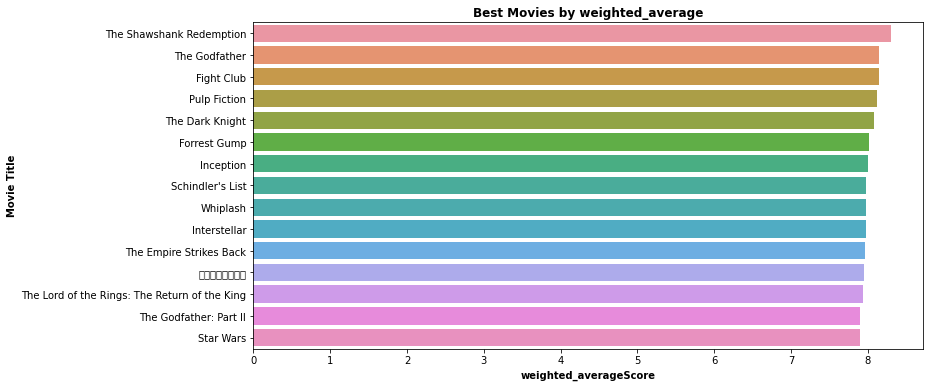

In [49]:
recommend_by(df=data2,col='weighted_average',title_col='original_title',top=15)

In [55]:
df=data2
metrics=['popularity','profit','weighted_average']
def normalize_metrics(df,metrics):
    df = df.copy()
    for metric_col in metrics:
        scaling=MinMaxScaler()
        new_feature = 'normalized_'+metric_col
        df[new_feature] =scaling.fit_transform(df[[metric_col]])
    return df
data3 = normalize_metrics(df,metrics)

In [57]:
data3

,original_title,popularity,profit,vote_average,vote_count,weighted_average,normalized_popularity,normalized_profit,normalized_weighted_average
0,Avatar,150.437577,2550965087,7.2,11800,7.134875,0.171815,1.000000,0.665509
1,Pirates of the Caribbean: At World's End,139.082615,661000000,6.9,4500,6.786315,0.158846,0.304310,0.565575
2,Spectre,107.376788,635674609,6.3,4466,6.270561,0.122635,0.294987,0.417706
3,The Dark Knight Rises,112.312950,834939099,7.6,9106,7.487101,0.128272,0.368336,0.766494
4,John Carter,43.926995,24139100,6.1,2124,6.097983,0.050169,0.069883,0.368227
...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,14.269792,1820920,6.6,238,6.216134,0.016298,0.061668,0.402102
4799,Newlyweds,0.642552,-9000,5.9,5,6.090877,0.000734,0.060994,0.366190
4800,"Signed, Sealed, Delivered",1.444476,0,7.0,6,6.099503,0.001650,0.060997,0.368663
4801,Shanghai Calling,0.857008,0,5.7,7,6.088482,0.000979,0.060997,0.365503


In [59]:
data3['harmonic_mean3'] = (3*data3.normalized_popularity*data3.normalized_profit*data3.normalized_weighted_average)/(data3.normalized_popularity+data3.normalized_profit+data3.normalized_weighted_average)

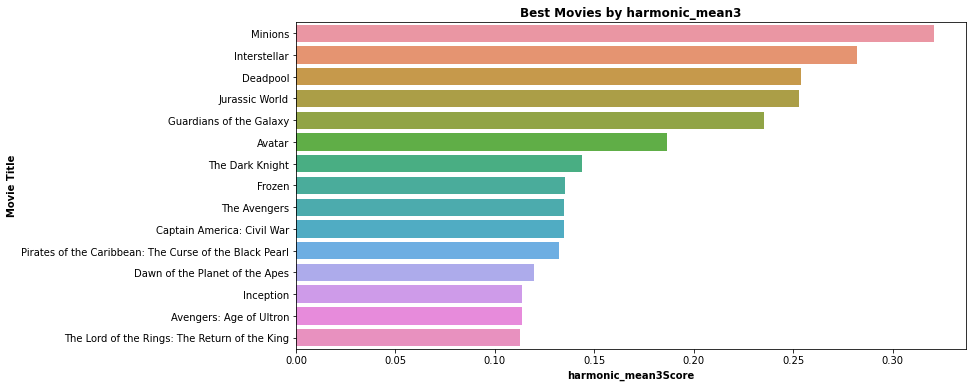

In [65]:
recommend_by(df=data3,col='harmonic_mean3',title_col='original_title',top=15)

In [61]:
data3['harmonic_mean_popularity_profit'] = (2*data3.normalized_popularity*data3.normalized_profit)/(data3.normalized_popularity+data3.normalized_profit)

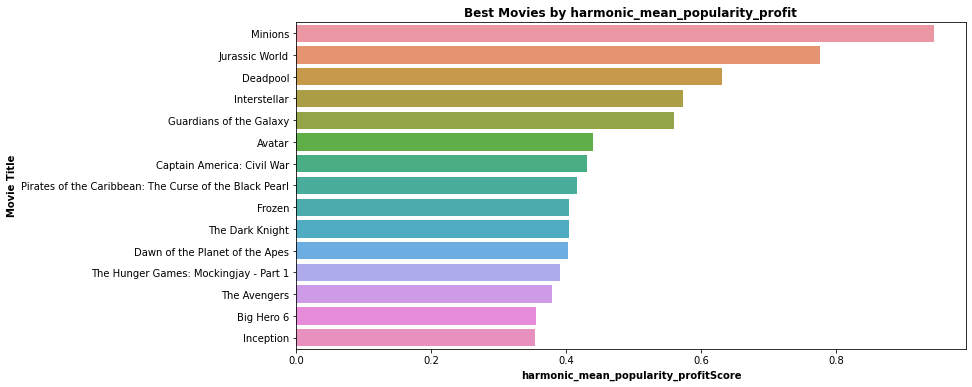

In [66]:
recommend_by(df=data3,col='harmonic_mean_popularity_profit',title_col='original_title',top=15)

In [62]:
data3['harmonic_mean_popularity_weighted_average'] = (2*data3.normalized_popularity*data3.normalized_weighted_average)/(data3.normalized_popularity+data3.normalized_weighted_average)

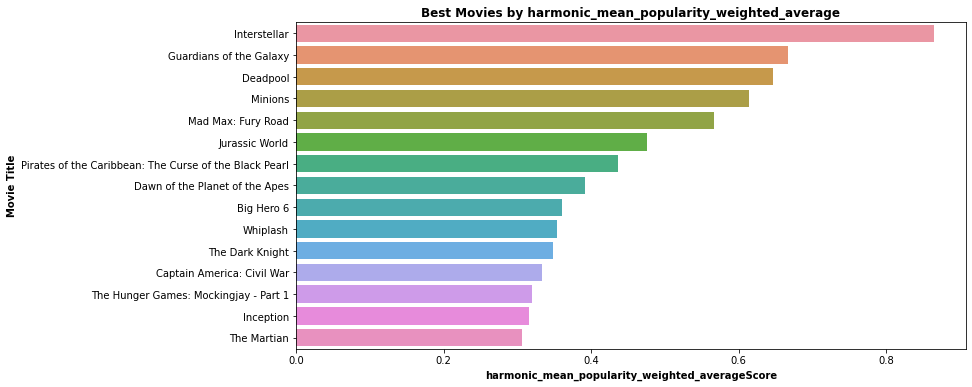

In [67]:
recommend_by(df=data3,col='harmonic_mean_popularity_weighted_average',title_col='original_title',top=15)

In [64]:
data3['harmonic_mean_profit_weighted_average'] = (2*data3.normalized_profit*data3.normalized_weighted_average)/(data3.normalized_profit+data3.normalized_weighted_average)

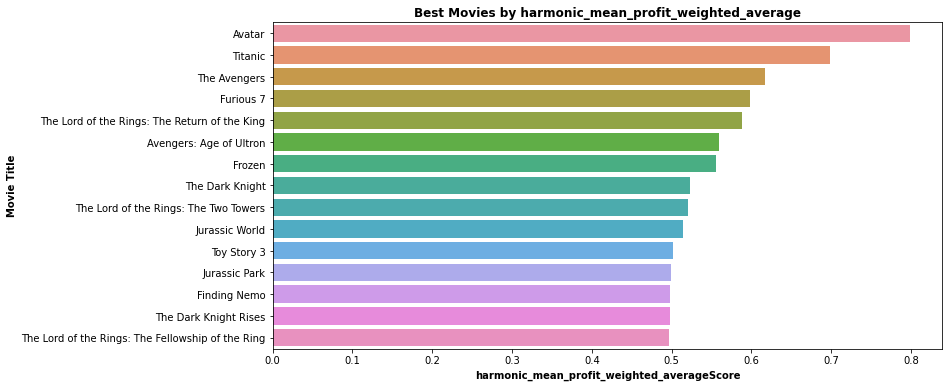

In [68]:
recommend_by(df=data3,col='harmonic_mean_profit_weighted_average',title_col='original_title',top=15)

In [69]:
data3

,original_title,popularity,profit,vote_average,vote_count,weighted_average,normalized_popularity,normalized_profit,normalized_weighted_average,harmonic_mean3,harmonic_mean_popularity_profit,harmonic_mean_popularity_weighted_average,harmonic_mean_profit_weighted_average
0,Avatar,150.437577,2550965087,7.2,11800,7.134875,0.171815,1.000000,0.665509,0.186702,0.439868,0.273118,0.799166
1,Pirates of the Caribbean: At World's End,139.082615,661000000,6.9,4500,6.786315,0.158846,0.304310,0.565575,0.079726,0.313102,0.248031,0.395707
2,Spectre,107.376788,635674609,6.3,4466,6.270561,0.122635,0.294987,0.417706,0.054269,0.259869,0.189604,0.345781
3,The Dark Knight Rises,112.312950,834939099,7.6,9106,7.487101,0.128272,0.368336,0.766494,0.086014,0.285420,0.219767,0.497568
4,John Carter,43.926995,24139100,6.1,2124,6.097983,0.050169,0.069883,0.368227,0.007932,0.087611,0.088307,0.117472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,14.269792,1820920,6.6,238,6.216134,0.016298,0.061668,0.402102,0.002525,0.038672,0.031325,0.106935
4799,Newlyweds,0.642552,-9000,5.9,5,6.090877,0.000734,0.060994,0.366190,0.000115,0.002175,0.001465,0.104570
4800,"Signed, Sealed, Delivered",1.444476,0,7.0,6,6.099503,0.001650,0.060997,0.368663,0.000258,0.004819,0.003285,0.104676
4801,Shanghai Calling,0.857008,0,5.7,7,6.088482,0.000979,0.060997,0.365503,0.000153,0.002890,0.001952,0.104547
